In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [2]:
#By default pandas detect 'NA' as null values so we use the code below to load the csv file with all the values.

data= pd.read_csv("D1.csv", keep_default_na = False, na_values = [""])

In [5]:
# Checking the data types determined by pandas
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5111 entries, 0 to 5110
Data columns (total 39 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   survey_date             5111 non-null   object 
 1   region                  5110 non-null   object 
 2   country                 5110 non-null   object 
 3   ip_latitude             5111 non-null   float64
 4   ip_longitude            5111 non-null   float64
 5   ip_accuracy             5111 non-null   int64  
 6   sex                     5111 non-null   object 
 7   age                     5111 non-null   object 
 8   height                  5111 non-null   int64  
 9   weight                  5111 non-null   int64  
 10  bmi                     5111 non-null   float64
 11  blood_type              5111 non-null   object 
 12  insurance               3943 non-null   object 
 13  income                  3943 non-null   object 
 14  race                    3943 non-null   

In [4]:
#Checking the skewness of data

print(data.skew())

ip_latitude               -2.087471
ip_longitude               1.652506
ip_accuracy                3.157092
age                       10.085116
height                    -0.444816
weight                     1.203467
bmi                        2.205616
contacts_count             1.001026
house_count                1.777352
public_transport_count     6.091561
worried                   -0.301183
covid19_positive           0.557063
covid19_symptoms           2.354682
covid19_contact            2.369179
asthma                     2.284441
kidney_disease             7.964242
liver_disease             10.175924
compromised_immune         3.605102
heart_disease              4.768362
lung_disease               6.159167
diabetes                   2.988074
hiv_positive              15.508909
hypertension               1.652573
other_chronic              3.341092
nursing_home              10.401023
health_worker              3.653815
risk_infection             0.406947
risk_mortality            13

In [9]:
#Checking the inconsistency of data, 

print(data['insurance'].unique())
print(data['worried'].unique())
print(data['income'].unique())
print(data['race'].unique())
print(data['immigrant'].unique())
print(data['smoking'].unique())
print(data['height'].unique())
print(data['weight'].unique())

#we can see lot of  blank values for insurance, worried, income, race, immigrant, smoking and wide range of values for weight & height.

[nan 'yes' 'no' 'blank']
[nan  4.  3.  5.  2.  1.]
[nan 'gov' 'med' 'low' 'blank' 'high']
[nan 'white' 'mixed' 'blank' 'black' 'asian' 'hispanic' 'other']
[nan 'native' 'immigrant' 'blank']
[nan 'never' 'quit5' 'quit0' 'quit10' 'yesheavy' 'vape' 'yesmedium'
 'yeslight']
[184 164 170 132 162 174 160 180 168 158 156 172 176 166 178 192 148 154
 186 188 194 146 190 144 122 152 182 228 150 202 198 114 110 136 238 204
 126 138 196 200 134 118 116 120 210 112 128 124 130]
[ 80  84  64 124 118  66  54  70 136  62  74  78 130 100  98  90 104 146
 116  96  48 126  76  82 108  60 114  92 110  94  50  46  86  68 148 144
  58 120 134 160  88  56  72 138 166  52 102 180 158 128 176 106 132 150
 112 174  44 122 168 152 178 142 140 164 162 154 156 170]


In [11]:
#Code for finding average BMI of a patient from US who is COVID-19 Positive

avgbmi=data[(data['country']=='US') & (data['covid19_positive']==True)]
avgbmi.bmi.mean()

30.89091653027822

In [12]:
#Code for finding highest average risk of mortality


datavar=data.groupby(by=['country']).mean()
highest_avg_risk_mortality = datavar.sort_values('risk_mortality', ascending=False)[['risk_mortality']]
highest_avg_risk_mortality.head(1)

,risk_mortality
country,
IT,10.031844


In [13]:
#Code for number of countries reporting at least 10 positive cases

var1=data.groupby(by='country').sum()
var2=var1[var1['covid19_positive']>=10][['covid19_positive']]
index = var2.index
numofrows = len(index)
print(numofrows)

12


In [15]:
#Code for finding top-five countries according to positive cases

var1=data.groupby(by='country').sum()
var2=var1[var1['covid19_positive']>=10][['covid19_positive']]
var3 = var2.sort_values('covid19_positive', ascending=False)
var3.head(5)


,covid19_positive
country,
US,1222
BR,154
GB,127
CA,51
IT,32


In [16]:
#We can find data quality issues by plotting the variables into appropriate graphs.

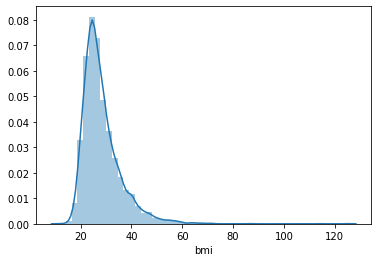

In [17]:
#Distribution graph for variable 'BMI'

import warnings
warnings.filterwarnings("ignore")
distribution = sns.distplot(data['bmi'])
plt.show()

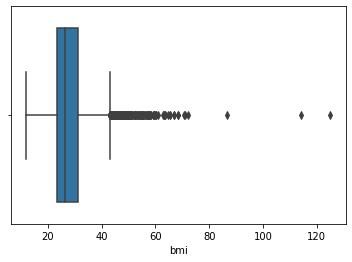

In [18]:
#BoxPlot for the variable 'BMI'

ax = sns.boxplot(data['bmi'])
plt.show()

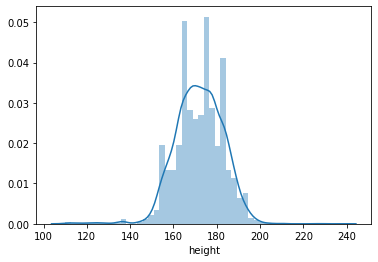

In [19]:
#Distribution graph for variable 'height'

import warnings
warnings.filterwarnings("ignore")
distribution = sns.distplot(data['height'])
plt.show()

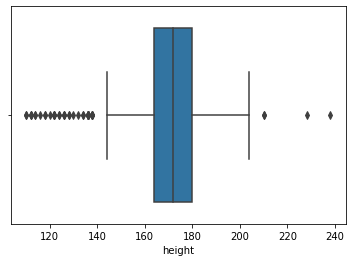

In [20]:
#BoxPlot for the variable 'height'

ax = sns.boxplot(data['height'])
plt.show()

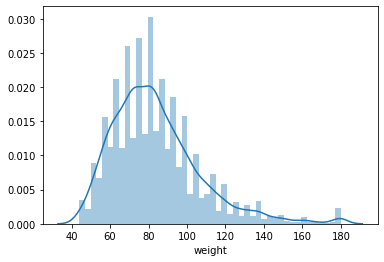

In [21]:
#Distribution graph for variable 'weight'

import warnings
warnings.filterwarnings("ignore")
distribution = sns.distplot(data['weight'])
plt.show()

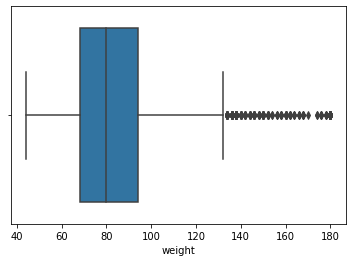

In [22]:
#BoxPlot for the variable 'weight'

ax = sns.boxplot(data['weight'])
plt.show()

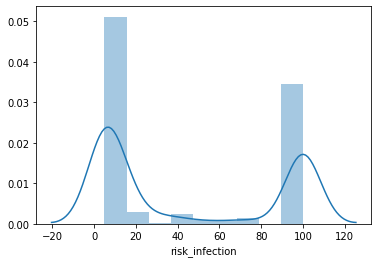

In [23]:
#Distribution for the variable 'risk_infection'

import warnings
warnings.filterwarnings("ignore")
distribution = sns.distplot(data['risk_infection'])
plt.show()

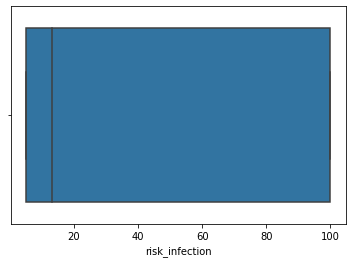

In [24]:
#BoxPlot for the variable 'risk_infection'

ax = sns.boxplot(data['risk_infection'])
plt.show()

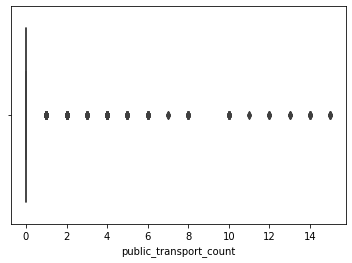

In [25]:
#BoxPlot for the variable 'public_transport_count'

ax = sns.boxplot(data['public_transport_count'])
plt.show()

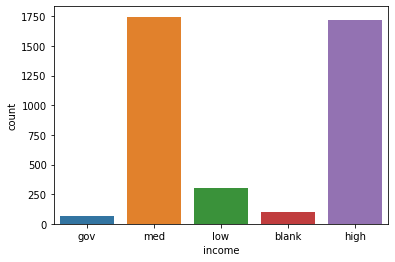

In [26]:
#Countplot for the variable 'income '

category = sns.countplot(data=data, x='income')
plt.show()

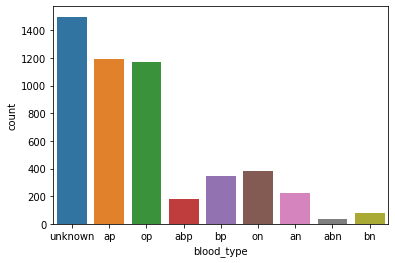

In [27]:
#Countplot for the variable 'blood_type '

category = sns.countplot(data=data, x='blood_type')
plt.show()

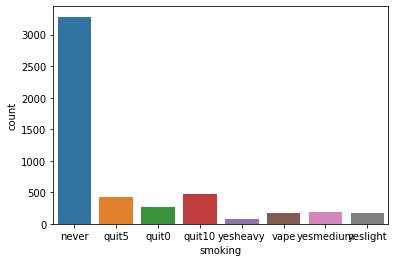

In [28]:
#Countplot for the variable 'smoking '

category = sns.countplot(data=data, x='smoking')
plt.show()

In [29]:
#Finding the correlation coefficient 

from scipy import stats
stats.pointbiserialr(data ['risk_infection'], data['covid19_positive'])

PointbiserialrResult(correlation=0.9630451752245646, pvalue=0.0)

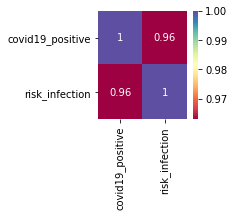

In [31]:
#we can confirm that in the heatmap

xfr = data[[ 'covid19_positive', 'risk_infection']]
corrmat = xfr.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(2,2))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="Spectral")

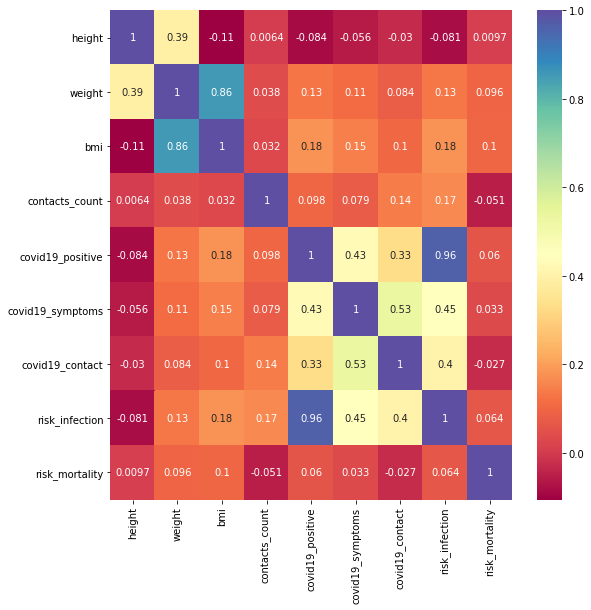

In [32]:
#Code for finding highly correlated variables using heatmap


nxtfrm = data[['height', 'weight', 'bmi', 'contacts_count', 'covid19_positive', 'covid19_symptoms', 'covid19_contact', 'risk_infection' , 'risk_mortality']]

corrmat = nxtfrm.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(9,9))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="Spectral")

In [33]:
#Using min-max scalar



X = data[['height', 'age', 'weight', 'bmi', 'contacts_count','house_count', 'public_transport_count', 'risk_infection', 'risk_mortality']]

from sklearn import preprocessing
x_vals = X.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x_vals)
X2 = pd.DataFrame(x_scaled)
print(X2)

             0         1         2         3         4    5    6    7  \
0     0.578125  0.050450  0.264706  0.103448       NaN  0.4  NaN  1.0   
1     0.421875  0.080719  0.294118  0.170645       NaN  0.0  NaN  1.0   
2     0.468750  0.020180  0.147059  0.090186  0.476190  0.0  NaN  1.0   
3     0.171875  0.900000  0.588235  0.523431       NaN  0.9  NaN  1.0   
4     0.578125  0.030270  0.544118  0.202476       NaN  0.2  NaN  1.0   
...        ...       ...       ...       ...       ...  ...  ...  ...   
5106  0.437500  0.070629  0.161765  0.106101  0.047619  0.1  0.0  0.0   
5107  0.453125  0.070629  0.191176  0.114058  0.095238  0.2  0.0  0.0   
5108  0.562500  0.070629  0.279412  0.113174  0.142857  0.2  0.0  0.0   
5109  0.578125  0.050450  0.264706  0.103448  0.000000  0.2  0.0  0.0   
5110  0.484375  0.030270  0.161765  0.091954  0.333333  0.1  0.0  0.0   

             8  
0     0.001921  
1     0.045804  
2     0.000000  
3     0.185764  
4     0.000881  
...        ...  
5106

In [34]:
#using z-score normalization

sc = StandardScaler()
num_data = data[['height', 'age', 'weight', 'bmi', 'contacts_count','house_count', 'public_transport_count', 'risk_infection', 'risk_mortality']]
data[num_data.columns] = sc.fit_transform(num_data)
print(num_data.skew())

height                    -0.444816
age                       10.085116
weight                     1.203467
bmi                        2.205616
contacts_count             1.001026
house_count                1.777352
public_transport_count     6.091561
risk_infection             0.406947
risk_mortality            13.180574
dtype: float64


In [35]:
#Creating function for data preparation 


import pandas as pd

df = pd.read_csv("D1.csv")


from scipy import stats
import numpy as np

def data_prep():
    global df
    income = df.replace(to_replace = ["gov"], value = "low")
    df['worried_bool'] = df['worried']>=4
    cleanup_smoking = {"smoking":     {"never": "no","quit5": "quit", "quit0": "quit", "quit10" :"quit",
                               "yesheavy" : "yes", "vape" : "yes", "yesmedium" :"yes", "yeslight" : "yes"}}
    df.replace(cleanup_smoking, inplace=True)
    
    for column in ['insurance', 'income', 'race', 'immigrant', 'worried']:
        df[column].fillna(df[column].mode()[0], inplace = True)
        
    df['public_transport_count'] = df['public_transport_count'].fillna(df['public_transport_count'].mean())
    
    df['region'].fillna('NA', inplace = True)
    df['region']
    
    df.dropna(inplace = True)
    
    df['survey_date'] = pd.to_datetime(df['survey_date'])
    for column in ['age', 'region', 'country' , 'sex' , 'blood_type', 'insurance', 'income' , 'race' , 'immigrant', 'smoking' , 'working' , 'worried' ,'covid19_positive' , 'covid19_symptoms' , 'covid19_contact' , 'asthma' , 'kidney_disease' , 'liver_disease' , 'compromised_immune' , 'heart_disease', 'lung_disease' , 'diabetes' , 'hiv_positive' , 'hypertension' , 'other_chronic', 'nursing_home' , 'health_worker' ]:
        df[column] = df[column].astype('category')
    
    df = pd.get_dummies(df)
    
    return df


In [36]:
data = data_prep()

In [37]:
y = data['risk_mortality']

X = data.drop(['risk_mortality'], axis = 1)

In [38]:
#Normalization of 
X = data[['height', 'weight', 'bmi', 'contacts_count','house_count', 'public_transport_count', 'risk_infection', 'risk_mortality']]

x_vals = X.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x_vals)
X2 = pd.DataFrame(x_scaled)
print(X2)


sc = StandardScaler()
num_data = data[['height', 'weight', 'bmi', 'contacts_count','house_count', 'public_transport_count', 'risk_infection', 'risk_mortality']]
data[num_data.columns] = sc.fit_transform(num_data)




             0         1         2         3    4         5    6         7
0     0.468750  0.147059  0.090186  0.476190  0.0  0.022893  1.0  0.000000
1     0.406250  0.161765  0.116711  0.142857  0.2  0.022893  1.0  0.000000
2     0.500000  0.294118  0.139699  0.142857  0.3  0.022893  1.0  0.009313
3     0.390625  0.073529  0.080460  0.095238  0.1  0.022893  1.0  0.000000
4     0.546875  0.294118  0.123784  0.190476  0.2  0.022893  1.0  0.000000
...        ...       ...       ...       ...  ...       ...  ...       ...
5059  0.437500  0.161765  0.106101  0.047619  0.1  0.000000  0.0  0.019293
5060  0.453125  0.191176  0.114058  0.095238  0.2  0.000000  0.0  0.046164
5061  0.562500  0.279412  0.113174  0.142857  0.2  0.000000  0.0  0.028299
5062  0.578125  0.264706  0.103448  0.000000  0.2  0.000000  0.0  0.006765
5063  0.484375  0.161765  0.091954  0.333333  0.1  0.000000  0.0  0.000000

[5064 rows x 8 columns]


In [41]:
X_mat = num_data.to_numpy()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_mat, y, 
                                                 test_size=0.30, 
                                                    random_state=10)

In [42]:
data.to_csv(r'C:\Users\ASUS\Pictures\Screenshots\finalexport_dataframe.csv', index = False , header = True)